In [1]:
%matplotlib notebook

In [2]:
import os
os.getcwd()
import sys
sys.path.append('../')


In [3]:
from osil_gen_data.data_collector import OsilDataCollector
import numpy as np
import matplotlib.pyplot as plt

collector = OsilDataCollector.load('../reacher_7dof-v1_osil_dataset_v2')
raw_data = collector.data


In [18]:

centers = []
for j in range(64):
    centers.append(np.stack([raw_data[0][j][i]['state'][-1, -3:] for i in range(100)]))
centers = np.stack(centers)

splits = {
#     'train': np.arange(64),
    'valid': [0, 1, 2, 3, 16, 17, 18, 19],
    # 'valid': [12, 13, 14, 15, 28, 29, 30, 31],
#     'test': [44, 45, 46, 47, 60, 61, 62, 63],
    'test': [32, 33, 34, 35, 48, 49, 50, 51],
    
}
splits['train'] = [i for i in np.arange(64) if i not in splits['valid'] + splits['test']]
print(splits)
test = centers[splits['test']].reshape(-1, 3)
valid = centers[splits['valid']].reshape(-1, 3)
train = centers[splits['train']].reshape(-1, 3)


{'valid': [0, 1, 2, 3, 16, 17, 18, 19], 'test': [32, 33, 34, 35, 48, 49, 50, 51], 'train': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]}


In [19]:
test.shape

(800, 3)

<IPython.core.display.Javascript object>


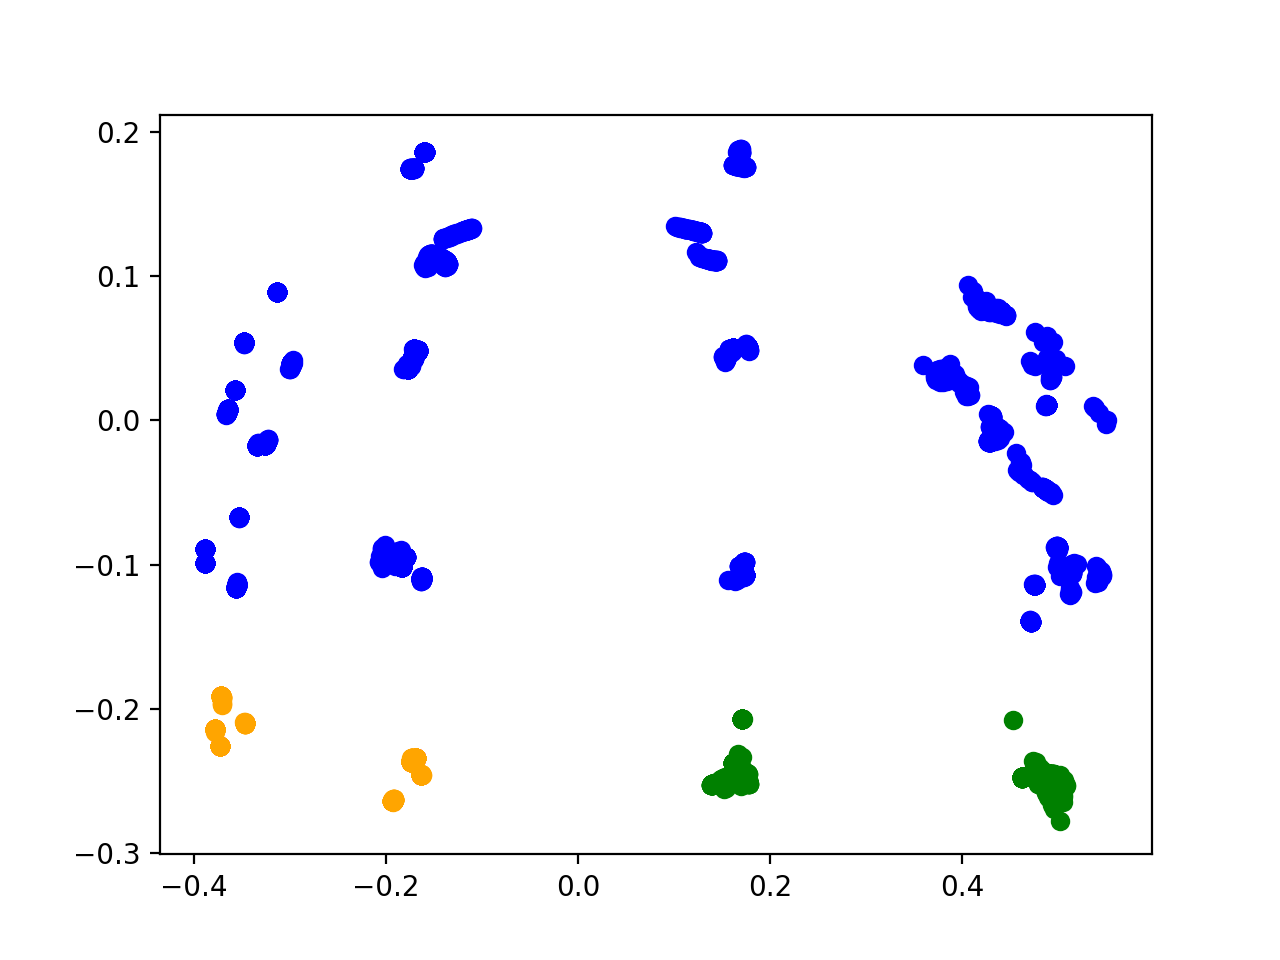

In [20]:
plt.figure()
plt.scatter(train[:, 0], train[:, 1], color='blue')
plt.scatter(valid[:, 0], valid[:, 1], color='orange')
plt.scatter(test[:, 0], test[:, 1], color='green')


<IPython.core.display.Javascript object>


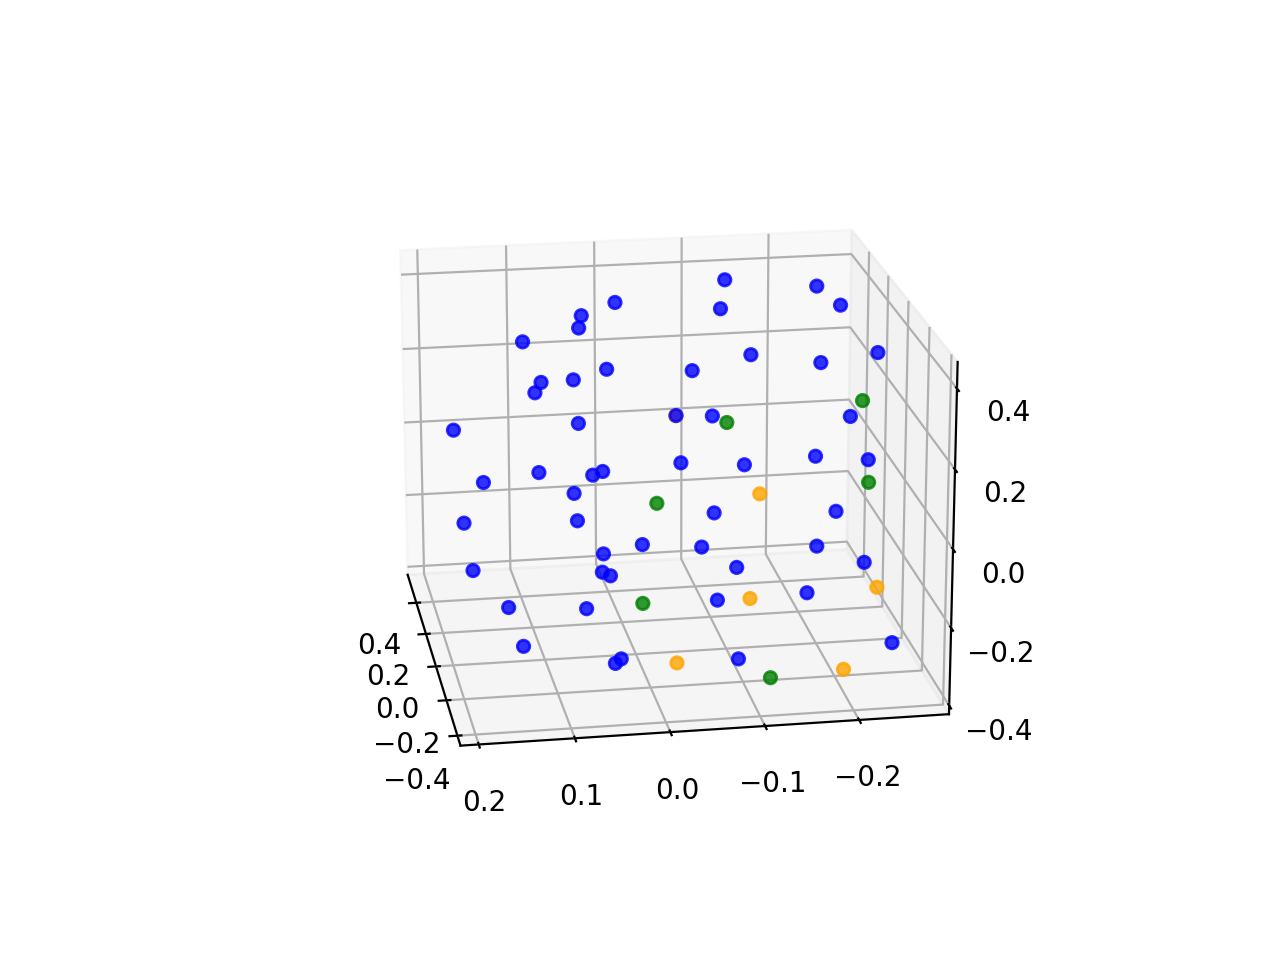

In [6]:

ax = plt.axes(projection ="3d")
ax.scatter3D(test[:, 0],  test[:, 1],  test[:, 2], color='green', alpha=0.8)
ax.scatter3D(valid[:, 0], valid[:, 1], valid[:, 2], color='orange', alpha=0.8)
ax.scatter3D(train[:, 0], train[:, 1], train[:, 2], color='blue', alpha=0.8)